Saving datos_ventas_inf.csv to datos_ventas_inf.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      56 non-null     datetime64[ns]
 1   venta      56 non-null     int64         
 2   inflacion  56 non-null     float64       
 3   emae       56 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.9 KB


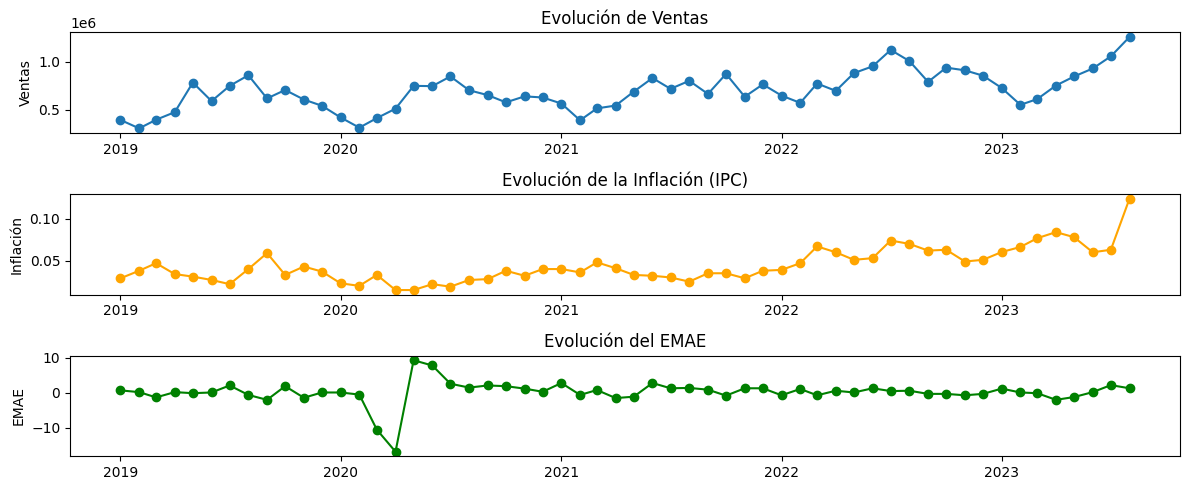

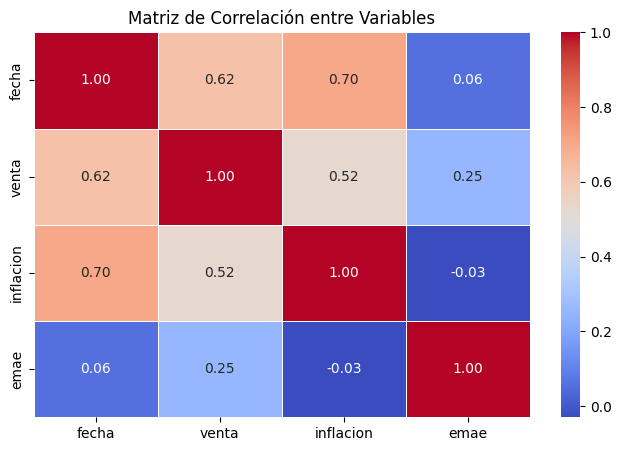

🔹 MAE (Error Absoluto Medio): 163699.46
🔹 MSE (Error Cuadrático Medio): 36229646720.76
🔹 R² (Coeficiente de Determinación): 0.15

📊 Coeficientes del modelo:
🔹 Inflación: 4798733.4913
🔹 EMAE: 15380.8600
🔹 Intercepto: 499589.99


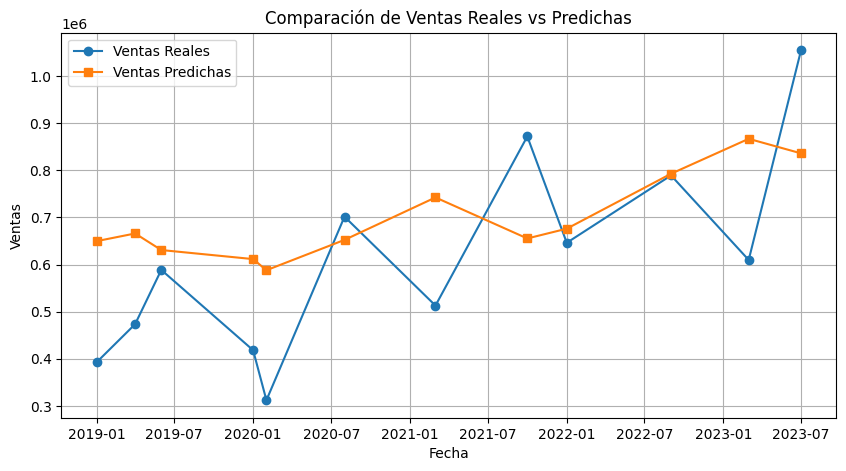

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00


NameError: name 'modelo_auto' is not defined

In [ ]:
import pandas as pd

# Cargar el archivo desde Google Colab
from google.colab import files
uploaded = files.upload()

# Leer el archivo CSV
file_name = "datos_ventas_inf.csv"  # Asegúrate de que este sea el nombre exacto
df = pd.read_csv(file_name)

# Mostrar las primeras filas
df.head()
# Convertir "fecha" a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m")

# Convertir "inflacion" a número decimal
df["inflacion"] = df["inflacion"].astype(float)

# Verificar que todo esté correcto
df.info()
# Resumen estadístico de las variables numéricas
df.describe()
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12,5))

# Graficar ventas
plt.subplot(3,1,1)
plt.plot(df["fecha"], df["venta"], marker='o', linestyle='-')
plt.title("Evolución de Ventas")
plt.ylabel("Ventas")

# Graficar inflación
plt.subplot(3,1,2)
plt.plot(df["fecha"], df["inflacion"], marker='o', linestyle='-', color='orange')
plt.title("Evolución de la Inflación (IPC)")
plt.ylabel("Inflación")

# Graficar EMAE
plt.subplot(3,1,3)
plt.plot(df["fecha"], df["emae"], marker='o', linestyle='-', color='green')
plt.title("Evolución del EMAE")
plt.ylabel("EMAE")

plt.tight_layout()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir variables independientes (X) e independiente (y)
X = df[["inflacion", "emae"]]  # Variables predictoras
y = df["venta"]  # Variable objetivo

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"🔹 MAE (Error Absoluto Medio): {mae:.2f}")
print(f"🔹 MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"🔹 R² (Coeficiente de Determinación): {r2:.2f}")

# Coeficientes del modelo
print("\n📊 Coeficientes del modelo:")
print(f"🔹 Inflación: {modelo.coef_[0]:.4f}")
print(f"🔹 EMAE: {modelo.coef_[1]:.4f}")
print(f"🔹 Intercepto: {modelo.intercept_:.2f}")
# Crear un DataFrame comparando valores reales y predichos
resultados = pd.DataFrame({"Fecha": df["fecha"].iloc[y_test.index],
                           "Ventas Reales": y_test,
                           "Ventas Predichas": y_pred})

# Ordenar por fecha
resultados = resultados.sort_values("Fecha")

# Mostrar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(resultados["Fecha"], resultados["Ventas Reales"], label="Ventas Reales", marker="o")
plt.plot(resultados["Fecha"], resultados["Ventas Predichas"], label="Ventas Predichas", marker="s")
plt.legend()
plt.title("Comparación de Ventas Reales vs Predichas")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

!pip install pmdarima
import pandas as pd

# Asegurar que el dataset está ordenado por fecha
df = df.sort_values("fecha")

# Establecer la columna "fecha" como índice
df.set_index("fecha", inplace=True)

# Visualizar los primeros datos
df.head()


# Mostrar los mejores parámetros
print(f"\n📌 Mejor modelo ARIMA encontrado: {modelo_auto.order}")
!pip uninstall -y numpy pmdarima statsmodels scipy
!pip cache purge
!pip install numpy==1.23.5
!pip install scipy==1.9.3
!pip install statsmodels==0.13.5

!
!pip cache purge

!pip cache purge
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asegurarse que "fecha" es el índice y está ordenado
df = df.sort_values("fecha")
df.set_index("fecha", inplace=True)

# Visualizar los primeros datos
df.head()
df = df.sort_values("fecha")
df.set_index("fecha", inplace=True)
from statsmodels.tsa.arima.model import ARIMA

# Crear el modelo ARIMA(1,1,1)
modelo_arima = ARIMA(df["venta"], order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()

# Mostrar resumen del modelo
print(modelo_arima_fit.summary())
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asegurar que la columna fecha esté como índice
df = df.sort_values("fecha")
df.set_index("fecha", inplace=True)

# Entrenar modelo ARIMA(1,1,1)
modelo_arima = ARIMA(df["venta"], order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()

# Mostrar resumen del modelo
print(modelo_arima_fit.summary())

# Pronóstico para los próximos 6 meses
n_periodos = 6
forecast = modelo_arima_fit.forecast(steps=n_periodos)

# Fechas futuras
future_dates = pd.date_range(df.index[-1] + pd.offsets.MonthEnd(), periods=n_periodos, freq='M')
df_forecast = pd.DataFrame({'Fecha': future_dates, 'Ventas Pronosticadas': forecast.values})

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(df.index, df["venta"], label="Ventas Históricas")
plt.plot(df_forecast["Fecha"], df_forecast["Ventas Pronosticadas"], label="Pronóstico", linestyle='--', marker='o')
plt.title("Pronóstico de Ventas con ARIMA (1,1,1)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Asegurar que la columna fecha esté como índice
df = df.sort_values("fecha")
df.set_index("fecha", inplace=True)

# Entrenar modelo ARIMA(1,1,1)
modelo_arima = ARIMA(df["venta"], order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()

# Mostrar resumen del modelo
print(modelo_arima_fit.summary())

# Pronóstico para los próximos 6 meses
n_periodos = 6
forecast = modelo_arima_fit.forecast(steps=n_periodos)

# Fechas futuras
future_dates = pd.date_range(df.index[-1] + pd.offsets.MonthEnd(), periods=n_periodos, freq='M')
df_forecast = pd.DataFrame({'Fecha': future_dates, 'Ventas Pronosticadas': forecast.values})

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(df.index, df["venta"], label="Ventas Históricas")
plt.plot(df_forecast["Fecha"], df_forecast["Ventas Pronosticadas"], label="Pronóstico", linestyle='--', marker='o')
plt.title("Pronóstico de Ventas con ARIMA (1,1,1)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar tabla con las predicciones
df_forecast
